# Pens and Printers New Product Sales Methods Analysis

Six weeks ago, we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens, and sticky notes. Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming.

We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two:

- Email: Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team.

- Call: Customers in this group were called by a member of the sales team. On average, members of the team were on the phone for around thirty minutes per customer.

- Email and Call: Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product may support their work. The email required little work from the team, and the call was around ten minutes per customer.

# Business Goals
Considering the launch of new products for office stationery needs, accompanied by changing customer purchasing methods, the sales strategy must also change. therefore, the sales team needs to ensure that the sales methods used are the best to sell the new product effectively. The sales team want to know the following insights:

- Differences in the number of customers based on each sales strategy approach
- The distribution of revenue overall and for each method
- Differences of revenue over time for each method
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar
- Any information about the customers

# Data Validation

In [66]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing the file as df
df = pd.read_csv('C:/Users/England/Desktop/jupyter/product_sales.csv')


In [67]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [69]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [70]:
#replace missing values in the revenue column with median revenue
df['revenue'] = df.revenue.fillna(df['revenue'].median())

In [71]:
# To print the unique values in each column and its count
columns = df.columns
for col in columns:
    unique_values = df[col].unique()
    num_of_unique_values = df[col].nunique()
    print(f"Unique values in {col}:")
    print(unique_values)
    print(num_of_unique_values)
    print('______________________________________')

Unique values in week:
[2 6 5 4 3 1]
6
______________________________________
Unique values in sales_method:
['Email' 'Email + Call' 'Call' 'em + call' 'email']
5
______________________________________
Unique values in customer_id:
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
15000
______________________________________
Unique values in nb_sold:
[10 15 11  9 13  8 12  7 14 16]
10
______________________________________
Unique values in revenue:
[ 89.5  225.47  52.55 ...  44.34  45.01  64.9 ]
6743
______________________________________
Unique values in years_as_customer:
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
42
______________________________________
Unique values in nb_site_visits:
[24 28 26 25 22 31 2

In [72]:
#Cleaning sales_method column to correct misspelt values
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})


In [73]:
# Filter the dataframe to find outliers in the 'years_as_customer' column...with years greater than (2024-1984)
years_as_customer_outliers = df[df['years_as_customer'] > 40]

# Print the outliers in the years_as_customer column
display(years_as_customer_outliers)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [74]:
#To remove rows with outliers
df = df.drop(years_as_customer_outliers.index)

In [75]:
# Check for duplicated rows
duplicates = df.duplicated()

# To count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the total number of duplicate rows
print(f"Total duplicates is {total_duplicates}")
print("\n")

# Select numeric columns in the dataframe
numeric_cols = df.select_dtypes(include=[int, float])

# Check if the numeric columns contain negative values
contains_negative = (numeric_cols < 0).any().any()
print(f"Contains negative values: {contains_negative}")

Total duplicates is 0


Contains negative values: False


In [76]:
#display information about the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [77]:
#Ensure there is no missing value in the dataset
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [78]:
#Exploring the revenue column grouped by sales approach
df.groupby('sales_method')['revenue'].agg(['mean', 'max', 'min']).round(2)

,mean,max,min
sales_method,,,
Call,49.13,89.50,32.54
Email,96.57,148.97,78.83
Email + Call,170.88,238.32,89.50


## Data Validation Summary

The dataset contained **15000** rows and **8** columns before cleaning and validation. I have validated all the columns against the criteria in the dataset table:
- **week**: 6 unique values (1-6) weeks without missing values, counted as weeks since product launch. No cleaning is needed. 
- **sales_method**: contains 5 unique categories instead of 3. Column has no missing value. Sales method entered as ‘email’ were replaced with ‘Email’ while those entered as ‘em + call’ were replaced with ‘Email + Call’. 
- **customer_id**: unique identifier for the customer, all values are unique; has no missing value. No cleaning is needed.
- **nb_sold**: numeric values in the range (7-16) without missing values showing number of new products sold. No cleaning is needed.
- **revenue**: revenue from sales rounded to 2 decimal places. Revenue has 1074 missing values (7% of total rows), Since missing values were more than 5%, the missing values were filled with the overall median revenue.
- **years_as_customers**: numeric values expected to be in the range of 0-40 years since company was founded in the year 1984; 2 impossible values (47 and 63) were found. The rows containing the outliers were dropped.
- **nb_site_visits**: number of times the customer has visited the website in the last 6 months. No missing value, no cleaning is needed.
- **state**: 50 categories of location where the products were shipped to. No missing value, no cleaning is required.

After the data validation and cleaning process, the dataset contains 14998 rows and 8 columns without missing values. 



## How many customers were there for each approach?

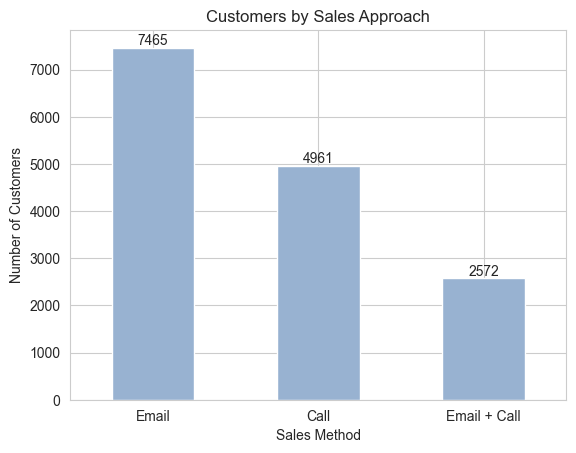

In [79]:
#Barchart showing number of customers for Each Sales Approach
sns.set_style('whitegrid')
ax = df.sales_method.value_counts().plot(kind="bar", color= '#98b2d1')
sns.set_style('whitegrid')
ax.set_title("Customers by Sales Approach")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)
plt.xticks(rotation=0)
plt.show()

plt.show()

From the product sales data of 6 weeks, 7465 customers were reached through the ‘Email’ sales method which is approximately 50% of the total customers. 4961 customers were reached through the ‘Call’ method which accounts for 33% and the least is the ‘Email + Call’ method which reached 2572 customers which is 17% of the total.

## What does the spread of the revenue look like overall? And for each of the sales method?


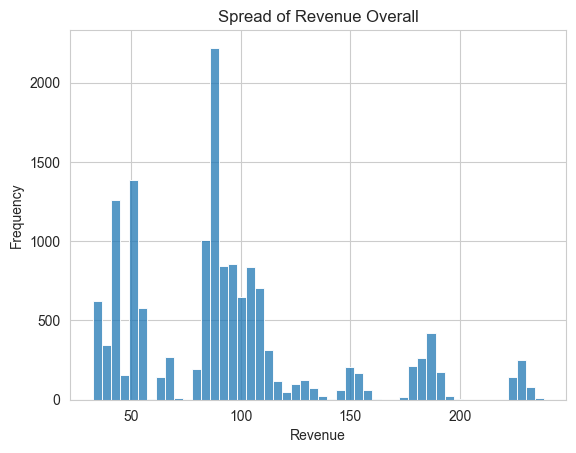

In [80]:
#Histogram showing Differences in revenue overall 
sns.histplot(data = df, x = 'revenue', bins = 50)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Spread of Revenue Overall')
plt.show()

The histogram above shows a wide spread, the first cluster is by the left with revenue from about 32 to 75, the middle distribution is between about 75 to 135 and there are small clusters around 150, 180 and 230. The minimum revenue is 32.54, median revenue is 89.50 while the mean revenue from the data is 93.62.

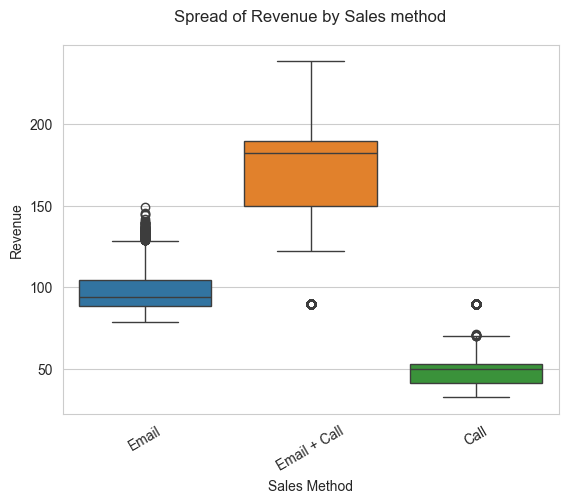

In [81]:
# Boxplot showing distribution in revenue for each sales method approach
g = sns.boxplot(x = 'sales_method', y = 'revenue', data =df, hue = 'sales_method')
g.set_title('Spread of Revenue by Sales method', y =1.04)
plt.xlabel('Sales Method')
plt.xticks(rotation = 30)
plt.ylabel('Revenue')
plt.show()

Looking at the boxplot of the revenue for each sales method, the spread differs for each sales method. The ‘Call’ method generated the least revenue between the range of 40-70. The “Email’ approach generated revenue between 80-120 with some outliers between 130-150. The ‘Email + Call’ approach generated the most significant spread between 120 and 240.

##Was there any difference in revenue over time for each of the methods?


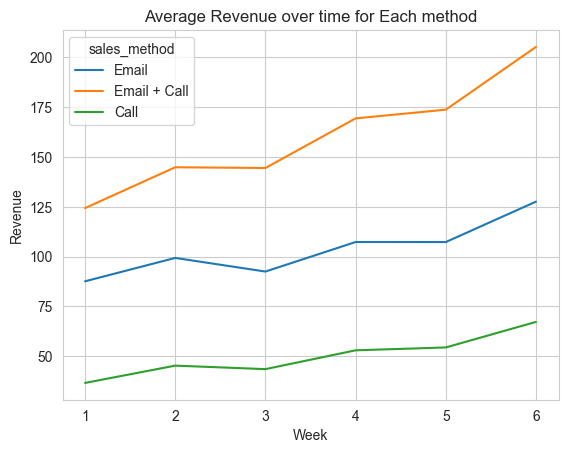

In [82]:
# Line plot of average revenue in each week
sns.lineplot(x = 'week', y ='revenue', hue = 'sales_method', data = df, errorbar= None)
plt.title('Average Revenue over time for Each method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

Looking at the average revenue for each of the sales methods. We can observe that there is a difference in the average revenue per customer throughout the six weeks. The ‘Call’ approach showed a consistent average revenue of about 50 for the first 5 weeks, but increased slightly in the last week.

For ‘Email’ approach, the average revenue remained below 100 and increased slightly in the 4th and 5th week, then finally got to 150 in the 6th week.

Finally, looking at the ‘Email + Call’ approach, there was a more significant increase over time. There was steady increase across the 6 weeks, with a slight dip in the 2nd week, but a significant growth in the 6th week.

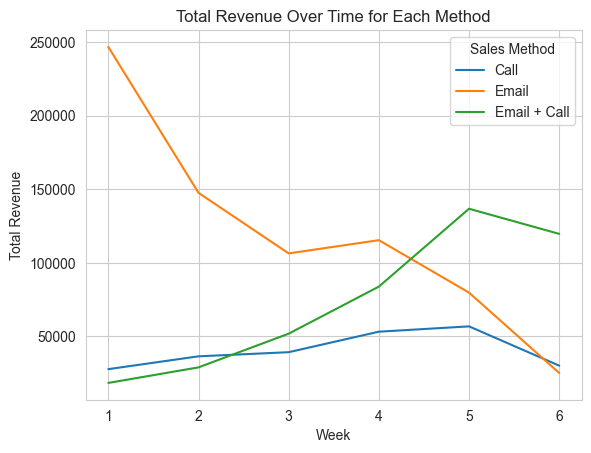

In [83]:
revenue_by_week = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Line plot of total revenue in each week
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_week, errorbar =None)
plt.title('Total Revenue Over Time for Each Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()

Looking at the change in total revenue over time as shown in the line plot, Email sales produced the highest total revenue in week 1 but declined greatly until week 6 when it became less than 50000.

The 'Email+ Call' approach however, experienced a steady rise in total revenue and also a slight decrease in week 6.

Finally, the ‘Call’ approach was almost constant throughout the 6 weeks.

## Based on the data, which method would you recommend we continue to use?


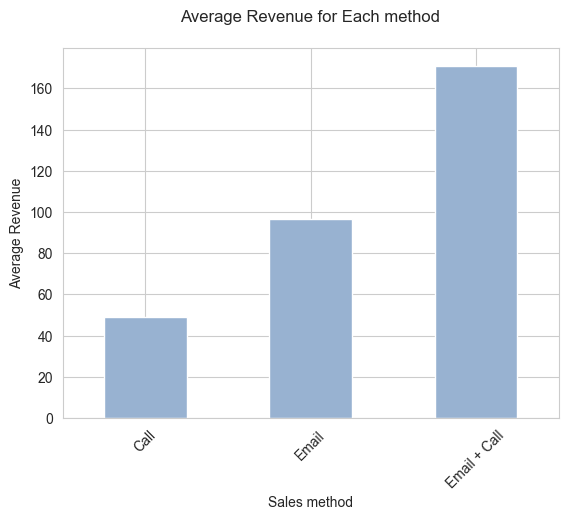

In [84]:
df_avg= df.groupby('sales_method')['revenue'].mean()
g= df_avg.plot(kind = 'bar', color= '#98b2d1')
g.set_title('Average Revenue for Each method', y= 1.05)
plt.xlabel('Sales method')
plt.xticks(rotation = 45)
plt.ylabel('Average Revenue')
plt.show()

Based on the data, considering the average revenue generated by the call method, I would recommend:

- Discontinuing the ‘Call’ approach due to low revenue and high time/cost requirements.

- Adopting the ‘Email + Call’ as the primary strategy given its high average revenue and fairly lower time compared to the ‘Call’ approach. The increase in total revenue as the weeks went by is also another reason why this approach should be considered.

- The ‘Email’ approach can be continued as a secondary strategy considering its low cost and time requirements. It also produced an average revenue close to the ‘Email + Call’ approach.

## Difference between Customers


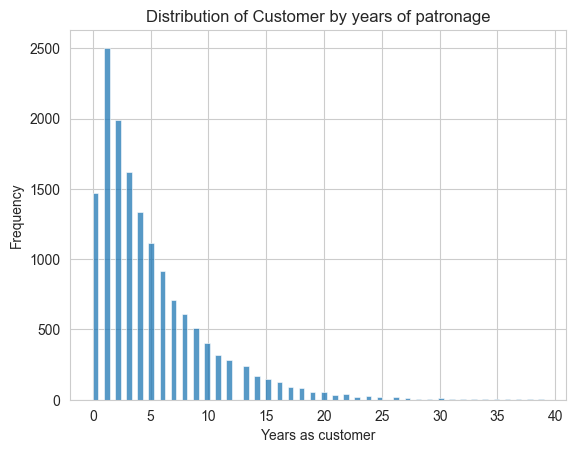

In [85]:
#Histogram showing Differences in revenue overall 
sns.histplot(data = df, x = 'years_as_customer')
plt.xlabel('Years as customer')
plt.ylabel('Frequency')
plt.title('Distribution of Customer by years of patronage')
plt.show()

The data also gives an insight into the distribution of customers patronizing the company, a large number of purchase is made by customers between 0 – 10 years of patronage while there is a decline in the purchase from old customers above 25 years.

## Business Metrics
The goal of the business is to make sales of the newly launched products using the most effective marketing technique. I would recommend that the business use the average revenue generated by ‘Email + Call’ approach which was the highest average revenue as a metric. Looking at the ‘Email + Call’ approach in the past 6 weeks, the average revenue generated was 170.88, to measure an increase in sales, the average revenue should not go below 170.88.

## Recommendations
For the following weeks, I would recommend that the company focuses on the following steps:

- I recommend that the company focus on ‘Email + Call’ method alongside 'Email' approach. Call approach should be discontinued entirely.
- The company should use key business metrics as described above to track sales growth.
- Use sales strategy including loyalty campaigns and offer discounts to long time customers to improve sales
- The company should also prioritize products with higher purchase rates compared to others
- Data collection process should be improved to prevent a repeat of missing values.
- Data should also be collected for in-depth analysis. Data about the type of products being purchased by the customers to analyze the what sells most and how to improve the sales of products that are sold less.